<a href="https://colab.research.google.com/github/ashtonsouthwick/DSPS_ASouthwick/blob/main/HW2/Bayesian_posteriors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Do priors matter??

Inspired by https://twitter.com/rlmcelreath/status/1701165078949581182/photo/1

TASK 1: Use `scipy.stats` to generate four distributions:
- a standard normal with mean 0, variance 1
- a standard normal with mean 10, variance 1
- a student's with 2 degrees of freedom centered on 0
- a student's with 2 degrees of freedom centered on 10

Plot all the distributions.


TASK 2: Create a function that takes two arguments: (1) a prior distribution (as a numpy array), (2) a likelihood distribution (same), calculates the posterior distributions, and plots the prior (with a black dashed line), likelihood (black solid line), and posterior (red line). Normalize each distribution before calculating the prior and plotting so that the peak is at the same height (for optimal visibility).

TASK 3: Pass to the function each combination of prior and likelihood between the four distributions you creted: normal-normal, t-t, normal-t, t-normal.

Your should end up with a plot of the posterior linelihood and prior in the same plot for each of the four posterior distributions (4 plots). EACH PLOT SHOULD BE FOLLOWED BY A CAPTION DESCRIBING THE WHAT THE WHY AND THE "WOW"



In [3]:
#these are all the imports you need
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

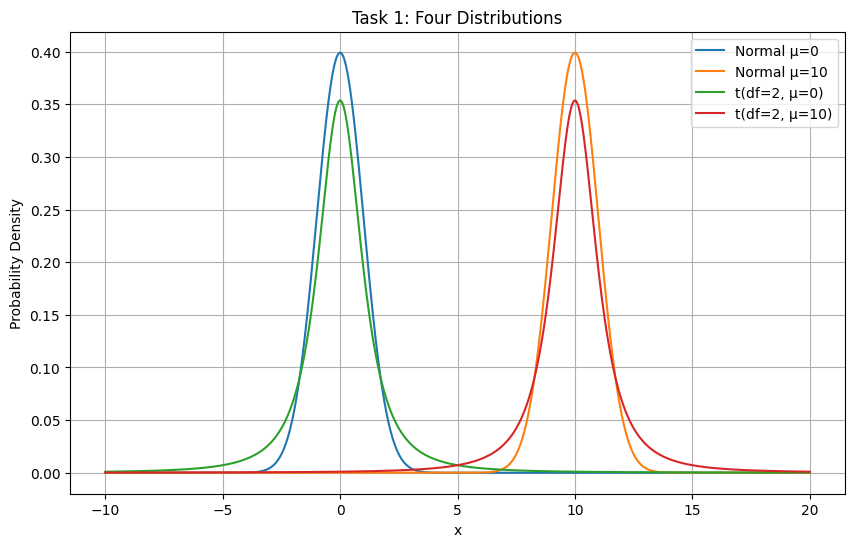

In [4]:
Norm_0 = stats.norm(loc=0, scale=1)
Norm_10 = stats.norm(loc=10, scale=1)
tStudent_0 = stats.t(df=2, loc=0)
tStudent_10 = stats.t(df=2, loc=10)

x = np.linspace(-10, 20, 1000)

pdfs = {
    "Normal μ=0": Norm_0.pdf(x),
    "Normal μ=10": Norm_10.pdf(x),
    "t(df=2, μ=0)": tStudent_0.pdf(x),
    "t(df=2, μ=10)": tStudent_10.pdf(x)
}

plt.figure(figsize=(10,6))
for label, pdf in pdfs.items():
    plt.plot(x, pdf, label=label)

plt.title("Task 1: Four Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)


In [19]:
def posterior(prior, likelihood, title, caption):
  normalized_prior = prior / np.max(prior)
  normalized_likelihood = likelihood / np.max(likelihood)
  this_posterior = normalized_prior * normalized_likelihood
  # this_posterior /= np.max(this_posterior)
  plt.title(title)
  plt.plot(x, normalized_prior, 'k--', label='Prior')
  plt.plot(x, normalized_likelihood, 'k-', label='Likelihood')
  plt.plot(x, this_posterior, 'r', label='Posterior')
  plt.xlabel('x') #all plots need axis labels!!
  plt.ylabel("Normalized Density") #all plots need axis labels!!
  plt.grid()
  plt.legend()
  plt.show()
  print(f"Caption: {caption}\n")

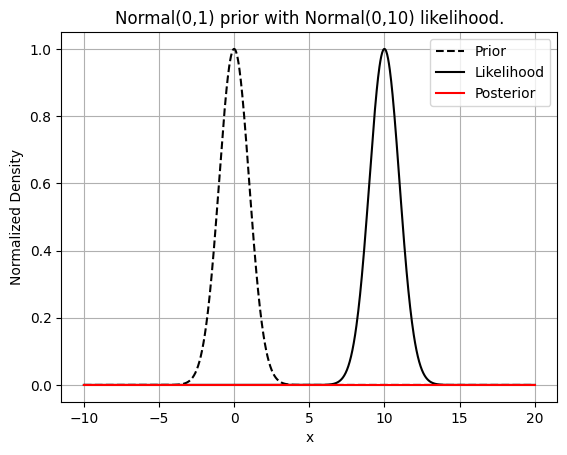

Caption: Here the prior and likelihood are both normal,
just shifted apart. The posterior reflects their overlap - not much. Because there is a very strong
disagreement, this shows how Bayesian updating can handle conflict between two sets disagree,
as the posterior will be basically empty if the prior and likelihood disagree.
There is a very slight peak for the posterior in the middle of the prior and likelihood, which shows
when the posterior is normalized.



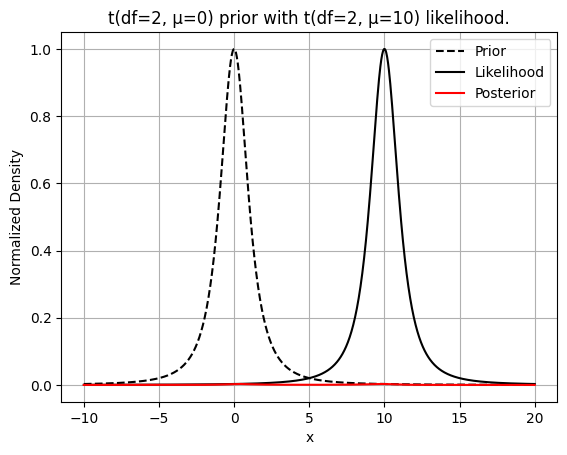

Caption: Both the prior and likelihood are heavy tailed student distributions,
just shifted apart. The posterior is more broad than the normal-normal case,
which shows how it's more tolerant to extreme values on the tails.



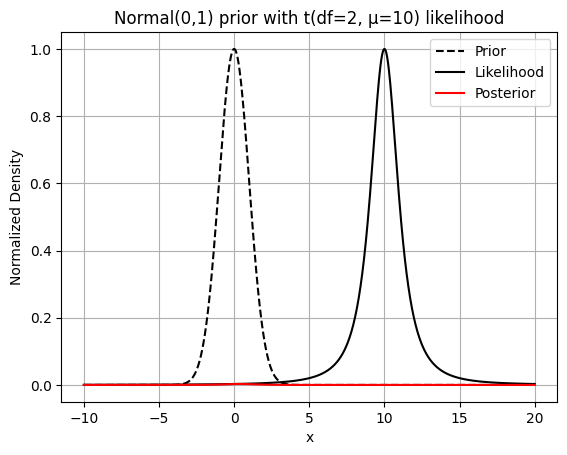

Caption: In this case the prior is a normal distribution centered at 0, with the likelihood as a student
distribution centered at 10, here the posterior has a slight peak closer to the normal prior
which again demonstrates how the posterior is more tolerant to the heavy tail on the student distribution.



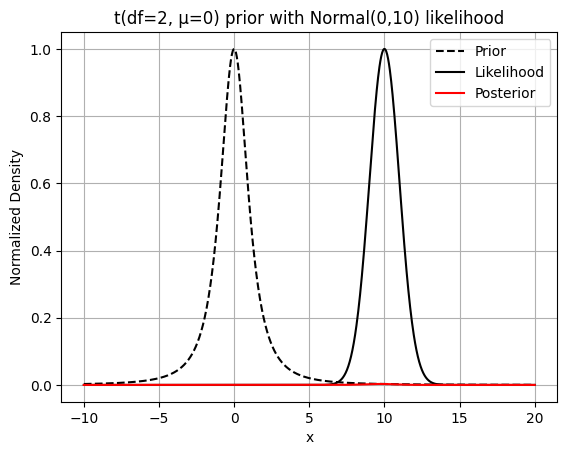

Caption: Here the prior is a student distribution centered at 0 and a likelihood of a normal distribution centered at 10.
The posterior has a slight peak closer to the likelihood, as the tail of the student has more extreme values than
the prior normal distribution. This shows that the priors with heavy tails will prevent overconfidence.



In [22]:
#function call
posterior(Norm_0.pdf(x), Norm_10.pdf(x), "Normal(0,1) prior with Normal(0,10) likelihood.",
          "Here the prior and likelihood are both normal,\n"
          "just shifted apart. The posterior reflects their overlap - not much. Because there is a very strong\n"
          "disagreement, this shows how Bayesian updating can handle conflict between two sets disagree,\n"
          "as the posterior will be basically empty if the prior and likelihood disagree.\n"
          "There is a very slight peak for the posterior in the middle of the prior and likelihood, which shows\n"
          "when the posterior is normalized.") #normal-normal

posterior(tStudent_0.pdf(x), tStudent_10.pdf(x), "t(df=2, μ=0) prior with t(df=2, μ=10) likelihood.",
          "Both the prior and likelihood are heavy tailed student distributions,\n"
          "just shifted apart. The posterior is more broad than the normal-normal case,\n"
          "which shows how it's more tolerant to extreme values on the tails. This means that\n"
          "student priors/likelihoods prevent overconfidence, as the posterior is much more spread out.") #t-t

posterior(Norm_0.pdf(x), tStudent_10.pdf(x), "Normal(0,1) prior with t(df=2, μ=10) likelihood",
          "In this case the prior is a normal distribution centered at 0, with the likelihood as a student\n"
          "distribution centered at 10, here the posterior has a slight peak closer to the normal prior\n"
          "which again demonstrates how the posterior is more tolerant to the heavy tail on the student distribution.") #normal-t

posterior(tStudent_0.pdf(x), Norm_10.pdf(x), "t(df=2, μ=0) prior with Normal(0,10) likelihood",
          "Here the prior is a student distribution centered at 0 and a likelihood of a normal distribution centered at 10.\n"
          "The posterior has a slight peak closer to the likelihood, as the tail of the student has more extreme values than\n"
          "the prior normal distribution. This shows that the priors with heavy tails will prevent overconfidence.") #t-Normal